Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
! shred -u grader.py
! wget https://raw.githubusercontent.com/NivedhithaE/competitive-data-science/master/Programming%20assignment%2C%20week%201%3A%20Pandas%20basics/grader.py -O grader.py
from grader import Grader

shred: grader.py: failed to open for writing: No such file or directory
--2019-07-22 09:26:36--  https://raw.githubusercontent.com/NivedhithaE/competitive-data-science/master/Programming%20assignment%2C%20week%201%3A%20Pandas%20basics/grader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3144 (3.1K) [text/plain]
Saving to: ‘grader.py’

grader.py           100%[===================>]   3.07K  --.-KB/s    in 0s      

2019-07-22 09:26:42 (46.4 MB/s) - ‘grader.py’ saved [3144/3144]



In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from tqdm import tqdm

from grader import Grader

In [3]:
from google.colab import files
files.upload()

Saving item_categories.csv to item_categories.csv
Saving items.csv to items.csv
Saving sales_train_v2.csv to sales_train_v2.csv
Saving shops.csv to shops.csv


In [0]:
transactions    = pd.read_csv('sales_train_v2.csv')
from copy import deepcopy
transactions_1 = deepcopy(transactions[:1000])
items           = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops           = pd.read_csv('shops.csv')

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [0]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [16]:
print(f"Transactions shape: {transactions.shape}")
print(transactions.head(10))

print(f"\nShops shape: {shops.shape}")
print(shops.head(10))

print(f"\nItems shape: {items.shape}")
print(items.head(10))

print(f"\nItem_categories shape: {item_categories.shape}")
print(item_categories.head(10))

Transactions shape: (2935849, 6)
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
5  10.01.2013               0       25     2564      349.00           1.0
6  02.01.2013               0       25     2565      549.00           1.0
7  04.01.2013               0       25     2572      239.00           1.0
8  11.01.2013               0       25     2572      299.00           1.0
9  03.01.2013               0       25     2573      299.00           3.0

Shops shape: (60, 2)
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2 

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [0]:
from dateutil.parser import *

def get_date(date):
  d = parse(date, dayfirst=True)
  return (d.day, d.month, d.year)
 
date_tuples = list(transactions['date'].apply(get_date))

transactions['day'] = [i[0] for i in date_tuples]
transactions['month'] = [i[1] for i in date_tuples]
transactions['year'] = [i[2] for i in date_tuples]

transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']

In [18]:
trans = transactions[(transactions.year == 2014) & (transactions.month == 9)]
trans = trans.groupby('shop_id').sum()

trans.head(10)

max_revenue = trans.revenue.max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [19]:
transactions.drop(['revenue'], axis=1)

trans = transactions[(transactions["year"] == 2014) & (transactions["month"] >= 6) & (transactions["month"] <= 8)]
trans = pd.merge(trans, items, how='left', on='item_id')
trans.revenue = trans['item_price'] * trans['item_cnt_day']
trans = trans.groupby('item_category_id').sum()

trans.nlargest(10, 'revenue')

category_id_with_max_revenue = trans.idxmax()['revenue']
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [20]:
trans = deepcopy(transactions)

num_unchanged = (trans['item_price'].groupby(trans.item_id).nunique() == 1).sum()

num_items_constant_price = num_unchanged
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

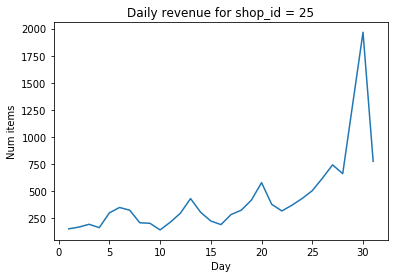

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [21]:
shop_id = 25
trans = deepcopy(transactions)
trans = trans[(trans.shop_id == shop_id) & (trans.month == 12) & (trans.year == 2014)]
trans = trans['item_cnt_day'].groupby(trans['day']).sum()

trans.head(10)

total_num_items_sold = trans.values
days = list(trans.index)

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = trans.var()
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [22]:
STUDENT_EMAIL = "novak.luka93@gmail.com"
STUDENT_TOKEN = "6dOwqdHE3Ol1bByI"
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [23]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)